In [24]:
import numpy as np
import plotly.express as px
import pandas as pd
from functions.common_functions import *
import plotly.io as pio


In [25]:
df_ee = pd.read_csv("../data/CPA_virtual_clusters_predictions.csv")


In [27]:
df_ee

,Rxn_Type,Imine,Nucleophile,rxn,net_rxn,Catalyst_Ar_grp,cluster_label,Predicted ee
0,Virtual,(Z)-Iminium 45,N11,(Z)-Iminium 45N11,(Z)-Iminium 45N11L15,L15,3,62.699802
1,Virtual,(E)-Iminium 90,N11,(E)-Iminium 90N11,(E)-Iminium 90N11L15,L15,14,74.473810
2,Virtual,(E)-Iminium 70,N11,(E)-Iminium 70N11,(E)-Iminium 70N11L15,L15,16,84.758680
3,Virtual,(E)-Iminium 72,N11,(E)-Iminium 72N11,(E)-Iminium 72N11L15,L15,14,75.421135
4,Virtual,(E)-Iminium 77,N11,(E)-Iminium 77N11,(E)-Iminium 77N11L15,L15,14,78.793106
...,...,...,...,...,...,...,...,...
125455,Virtual,(E)-Iminium 151,N26,(E)-Iminium 151N26,(E)-Iminium 151N26L9,L9,39,72.179700
125456,Virtual,(E)-Iminium 111,N26,(E)-Iminium 111N26,(E)-Iminium 111N26L9,L9,48,80.431854
125457,Virtual,(Z)-Iminium 3,N26,(Z)-Iminium 3N26,(Z)-Iminium 3N26L9,L9,0,65.993330
125458,Virtual,(E)-Iminium 112,N26,(E)-Iminium 112N26,(E)-Iminium 112N26L9,L9,48,73.164080


# Generality

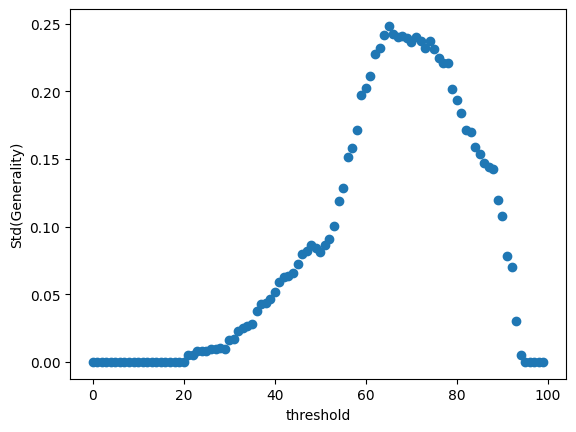

In [28]:
import matplotlib.pyplot as plt

cats = df_ee['Catalyst_Ar_grp'].unique()
diversity =[]
threshold =[]
generality_df = pd.DataFrame(columns=cats)
id=0
for i in np.arange(0,100,1):
    
    cat_list = []
    gen_list = []
    cluster_label_list = []
    cluster_label_ee_list = []
    for cat in cats:
        generality, cluster_labels, cluster_label_ee = calc_generality(df_ee,cat,'Catalyst_Ar_grp','Predicted ee', df_ee['cluster_label'], i)
        cat_list.append(cat)
        gen_list.append(generality)
        cluster_label_list.append(cluster_labels)
        cluster_label_ee_list.append(cluster_label_ee)
    diversity.append(np.std(gen_list))
    generality_df.loc[id] = gen_list
    threshold.append(i)
    id+=1

plt.scatter(threshold,diversity)
plt.xlabel('threshold')

plt.ylabel('Std(Generality)')

opt_threshold = np.argmax(diversity)

In [29]:
opt_threshold

65

In [30]:
## Calculate Generality ##
cats = df_ee['Catalyst_Ar_grp'].unique()
cat_list = []
gen_list = []
cluster_label_list = []
cluster_label_ee_list = []
for cat in cats:
    generality, cluster_labels, cluster_label_ee = calc_generality(df_ee,cat,'Catalyst_Ar_grp','Predicted ee', df_ee['cluster_label'],threshold[opt_threshold])
    cat_list.append(cat)
    gen_list.append(generality)
    cluster_label_list.append(cluster_labels)
    cluster_label_ee_list.append(cluster_label_ee)

gen = pd.Series(gen_list,cat_list)
gen = gen.sort_values(ascending=True)
fig = px.bar(x=gen, y=gen.index, title='Generality',
            labels={'x':'Catalyst Class', 'y':'Generality'},
            template='simple_white', orientation='h',
            color_discrete_sequence=[px.colors.qualitative.T10[0],
            px.colors.qualitative.T10[0],
            px.colors.qualitative.T10[4]],
            width=980, height=720,
                )


                


fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=12,xaxis_title='Generality', yaxis_title='Catalyst', 
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()


# Old Generality measurments

In [31]:
cats = df_ee['Catalyst_Ar_grp'].unique()
cat_list = []
gen_list = []
cluster_label_list = []
cluster_label_ee_list = []
for cat in cats:
    generality, cluster_labels, cluster_label_ee = calc_generality(df_ee,cat,'Catalyst_Ar_grp','Predicted ee', df_ee['cluster_label'],60)
    cat_list.append(cat)
    gen_list.append(generality)
    cluster_label_list.append(cluster_labels)
    cluster_label_ee_list.append(cluster_label_ee)

gen = pd.Series(gen_list,cat_list)
gen = gen.sort_values(ascending=True)
fig = px.bar(x=gen, y=gen.index, title='Old Generality threshold',
            labels={'x':'Catalyst Class', 'y':'Generality'},
            template='simple_white', orientation='h',
            color_discrete_sequence=[px.colors.qualitative.T10[0],
            px.colors.qualitative.T10[0],
            px.colors.qualitative.T10[4]],
            width=980, height=720,
                )


                


fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=12,xaxis_title='Generality', yaxis_title='Catalyst', 
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()

# Genrality at different Thresholds

In [32]:
fig = px.line(generality_df)

# Customize the layout
fig.update_layout(xaxis_title='Threshold', yaxis_title='Generality', legend_title=None, xaxis_tickangle=-4,template='simple_white',width=980, height=720,
                  )

# Show the plot
fig.show()

# ee Distribution

In [37]:
diversity =[]
threshold =[]
percentage_df = pd.DataFrame(columns=cats)
id=0
def calculate_percent(data,p,q):
    data1 = data[data< q]
    percent = len(data1[data1>= p])/len(data)
    return percent

old=0
for i in np.arange(0,100,1):
    cats = df_ee['Catalyst_Ar_grp'].unique()
    cat_list = []
    gen_list = []
    cluster_label_list = []
    cluster_label_ee_list = []
    if i>0:
        percentage = df_ee.groupby('Catalyst_Ar_grp')['Predicted ee'].apply(calculate_percent, old,i)
        gen_list=percentage
            
        diversity.append(np.std(gen_list))
        percentage_df.loc[id] = gen_list
        threshold.append(i)
    id+=1
    old=i

In [38]:
fig = px.line(percentage_df)

# Customize the layout
fig.update_layout(xaxis_title='ee', yaxis_title='Frequency', legend_title=None, xaxis_tickangle=-4,template='simple_white',width=980, height=720,
                  )

# Show the plot
fig.show()

# Risk Metrics

In [39]:

def calculate_var_es(data):
    var = np.percentile(data, 100 * (1 - 0.9))
    tail_losses = data[data < var]
    es = tail_losses.mean()
    return pd.Series({'VAR': var, 'ES': es})

results = df_ee.groupby('Catalyst_Ar_grp')['Predicted ee'].apply(calculate_var_es).reset_index()
results = results.sort_values(by="Predicted ee",ascending=True)


fig = px.bar(results, y='Catalyst_Ar_grp', x='Predicted ee', title='VAR and ES by Catalyst',
             labels={'variable': 'Metric', 'value': 'Value'}, barmode='group',color='level_1',template='simple_white',)
fig.update_layout(
    font_size=8,
)
# Customize the layout
fig.update_layout(xaxis_title='VaR & ES', yaxis_title='Catalyst', legend_title=None, xaxis_tickangle=0)

# Show the plot
fig.show()


# Dominance

In [36]:
df_ee['Normalized_rank'] = (df_ee.groupby('rxn')['Predicted ee'].transform(lambda g: (g-g.min())/(g.max()-g.min())))
mean_quant = df_ee.groupby(['Catalyst_Ar_grp',"cluster_label"])['Normalized_rank'].mean()
df_split =  pd.DataFrame(mean_quant)

Dominance = df_split.groupby(['Catalyst_Ar_grp' ])['Normalized_rank'].mean()
Dominance = Dominance.sort_values( ascending=True)

fig = px.bar(x=Dominance, y=Dominance.index,
                title='Dominance',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=12,xaxis_title='Dominance', yaxis_title='Catalyst', 
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()

